In [40]:
import pandas as pd
path = 'C://Users//User//Documents//GitHub//Springboard-DSC\\Take home challenges\\relax_challenge\\takehome_users.csv'
path_two = 'C://Users//User//Documents//GitHub//Springboard-DSC\\Take home challenges\\relax_challenge\\takehome_user_engagement.csv'
takehome_users = pd.read_csv(path)
takehome_engagement = pd.read_csv(path_two)

In [17]:
takehome_engagement = takehome_engagement.reset_index()
takehome_engagements = pd.melt(takehome_engagement,'time_stamp')

In [33]:
engagement_wide = takehome_engagement.groupby('user_id')['time_stamp'].apply(list).apply(pd.Series)

In [76]:
takehome_engagement['time_stamp'] = pd.to_datetime(takehome_engagement['time_stamp'])
#extract week number
takehome_engagement['week'] = takehome_engagement['time_stamp'].dt.week
grouped = takehome_engagement.groupby(['week','user_id'])['time_stamp'].count().reset_index(name='nums')
users = grouped[grouped['nums'] >= 3]
users['adopted_user'] = 'Yes'

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
merged = takehome_users.merge(users[['user_id','adopted_user']],how='left',
                         left_on='object_id', right_on='user_id')

In [106]:
merged.creation_source.unique()
merged.loc[(merged['creation_source'] == 'GUEST_INVITE') 'creation_source'] = 1
merged.loc[(merged['creation_source'] == 'ORG_INVITE') 'creation_source'] = 2
merged.loc[(merged['creation_source'] == 'SIGNUP') 'creation_source'] = 3
merged.loc[(merged['creation_source'] == 'PERSONAL_PROJECTS') 'creation_source'] = 4
merged.loc[(merged['creation_source'] == 'SIGNUP_GOOGLE_AUTH') 'creation_source'] = 5
#time delta between creation time and last login date
merged['time_delta'] = (pd.to_datetime(merged['creation_time']) - pd.to_datetime(merged['last_session_creation_time'])).dt.days

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [101]:
merged['adopted_user'] = merged['adopted_user'].fillna('No')
#convere adopted user to numeric variable
merged.loc[(merged['adopted_user'] == 'Yes'),'adopted'] = 1
merged.loc[(merged['adopted_user'] == 'No'),'adopted'] = 0

In [122]:
merged.corr()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted,time_delta
object_id,1.000000,-0.006096,-0.046270,-0.037062,-0.015767,0.100353,1.000000,-0.008067,0.015591
last_session_creation_time,-0.006096,1.000000,0.006148,-0.000075,0.066840,0.006375,-0.017179,0.732040,0.033120
opted_in_to_mailing_list,-0.046270,0.006148,1.000000,0.478601,-0.031263,0.022517,-0.050961,0.014749,0.016795
enabled_for_marketing_drip,-0.037062,-0.000075,0.478601,1.000000,-0.024446,0.016430,-0.042295,0.004916,-0.016038
org_id,-0.015767,0.066840,-0.031263,-0.024446,1.000000,-0.087800,-0.021849,0.089171,-0.046384
invited_by_user_id,0.100353,0.006375,0.022517,0.016430,-0.087800,1.000000,0.131333,0.002422,0.006724
user_id,1.000000,-0.017179,-0.050961,-0.042295,-0.021849,0.131333,1.000000,NaN,0.010578
adopted,-0.008067,0.732040,0.014749,0.004916,0.089171,0.002422,NaN,1.000000,-0.401994
time_delta,0.015591,0.033120,0.016795,-0.016038,-0.046384,0.006724,0.010578,-0.401994,1.000000


#### Analysis

From looking at the correlation matrix it would appear as though the numeric variable that is the biggest predicted of whether a user will convert to an adopted user is the time and date of their last login. This to me indicates that it might be interesting to create a new column that is delta between the time someone signed up and their last login. It would be fairly logical to assume that the longer someone uses the platform the more likely they are to be considered an adopted user

In [104]:
#non numeric columns
merged[['creation_source','adopted_user']].corr()

""


In [93]:

merged.corr()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id
object_id,1.000000,-0.006096,-0.046270,-0.037062,-0.015767,0.100353,1.000000
last_session_creation_time,-0.006096,1.000000,0.006148,-0.000075,0.066840,0.006375,-0.017179
opted_in_to_mailing_list,-0.046270,0.006148,1.000000,0.478601,-0.031263,0.022517,-0.050961
enabled_for_marketing_drip,-0.037062,-0.000075,0.478601,1.000000,-0.024446,0.016430,-0.042295
org_id,-0.015767,0.066840,-0.031263,-0.024446,1.000000,-0.087800,-0.021849
invited_by_user_id,0.100353,0.006375,0.022517,0.016430,-0.087800,1.000000,0.131333
user_id,1.000000,-0.017179,-0.050961,-0.042295,-0.021849,0.131333,1.000000


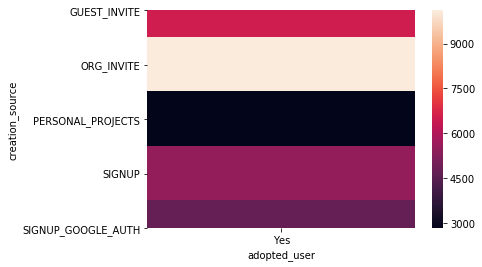

In [90]:
import seaborn as sns
sns.heatmap(pd.crosstab(merged.creation_source, merged.adopted_user))

In [84]:
#linear regres

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted_user
0,1,2014-04-22 3:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN,NaN
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN,NaN
3,4,2013-05-21 8:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN,NaN
5,6,2013-12-17 3:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
40321,11996,2013-09-06 6:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,NaN,NaN
40322,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,NaN,NaN
40323,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,NaN,NaN
40324,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,NaN,NaN
